In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import datetime
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
from statistics import mean
import glob
import sys
sys.path.append('C:/Users/gianl/Desktop/Gi/Supsi/BachelorProject/notebook/tweet_utils')
import tweets_utils
import importlib
import seaborn as sns
from tqdm.notebook import tqdm
folder = "F:/Supsi/TwitterData/China - Xinjiang/" #edit *
folder2 = "F:/Supsi/TwitterData/China - Changyu/" #edit *
path_profiles = glob.glob(folder + "*users_csv*.csv")
path_profiles2 = glob.glob(folder2 + "*users_csv*.csv")
path_data = glob.glob(folder + "*tweets_csv*.csv")
path_data2 = glob.glob(folder2 + "*tweets_csv*.csv")
path_yt = glob.glob(folder + "yt_info.csv")
# We removed a network of accounts that amplified Chinese Communist Party 
# narratives related to the treatment of the Uyghur population in Xinjiang. 
# We also removed a network of 112 accounts connected to “Changyu Culture,” 
# a private company backed by the Xinjiang regional government.

# Dataset Details
![alt text](info_dataset.png "Title")

In [17]:
users = pd.read_csv(path_profiles[0], lineterminator="\n", low_memory=False)
users

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language
0,3zvCXDc17MMhwBAgzOzEkpFjRxFW2XOOV8Xf5Fg3JCg=,3zvCXDc17MMhwBAgzOzEkpFjRxFW2XOOV8Xf5Fg3JCg=,3zvCXDc17MMhwBAgzOzEkpFjRxFW2XOOV8Xf5Fg3JCg=,NaN,NaN,NaN,0,1,2020-03-12,en
1,Qoe59F4ZoLJs0oEUBvFVO6jHBXTSVaA5SU3erUo2gc=,Qoe59F4ZoLJs0oEUBvFVO6jHBXTSVaA5SU3erUo2gc=,Qoe59F4ZoLJs0oEUBvFVO6jHBXTSVaA5SU3erUo2gc=,NaN,NaN,NaN,0,7,2020-12-30,en
2,17mhcuzBLct4cX5mYn3Tiwh2rIfoLjlDXYucCcoSTU=,17mhcuzBLct4cX5mYn3Tiwh2rIfoLjlDXYucCcoSTU=,17mhcuzBLct4cX5mYn3Tiwh2rIfoLjlDXYucCcoSTU=,NaN,NaN,NaN,0,10,2020-03-12,en
3,mHVC+13U3xiLKi9lyc+CkW3QPJ63P1FR3P2qpwXTzk=,mHVC+13U3xiLKi9lyc+CkW3QPJ63P1FR3P2qpwXTzk=,mHVC+13U3xiLKi9lyc+CkW3QPJ63P1FR3P2qpwXTzk=,NaN,NaN,NaN,0,6,2020-03-29,en
4,iuKSv0cHQ9y5ShuTSNQ7ryFu9VUGC33T0qK9KJSTo=,iuKSv0cHQ9y5ShuTSNQ7ryFu9VUGC33T0qK9KJSTo=,iuKSv0cHQ9y5ShuTSNQ7ryFu9VUGC33T0qK9KJSTo=,NaN,NaN,NaN,32,106,2021-01-12,en
...,...,...,...,...,...,...,...,...,...,...
2042,1riuCZquXgCjgjVCBczN8xarjXda64V+heas7p3Zxi4=,1riuCZquXgCjgjVCBczN8xarjXda64V+heas7p3Zxi4=,1riuCZquXgCjgjVCBczN8xarjXda64V+heas7p3Zxi4=,NaN,NaN,NaN,0,2,2020-02-29,en
2043,vVZwO58tPc+4ijj6uSmt8zba8y4++V1N9aZNweSjTeE=,vVZwO58tPc+4ijj6uSmt8zba8y4++V1N9aZNweSjTeE=,vVZwO58tPc+4ijj6uSmt8zba8y4++V1N9aZNweSjTeE=,NaN,￥￥￥￥￥￥,NaN,0,2,2020-01-19,en
2044,q2QHQ6lb3UCu1ESjJwUbZ3grQE1dmfaMnDmEy7nZnbw=,q2QHQ6lb3UCu1ESjJwUbZ3grQE1dmfaMnDmEy7nZnbw=,q2QHQ6lb3UCu1ESjJwUbZ3grQE1dmfaMnDmEy7nZnbw=,NaN,NaN,NaN,0,10,2020-03-12,en
2045,aJ2MLuej3gxb2Obj9OWhYkwq+cklS4puC3XfAUAk=,aJ2MLuej3gxb2Obj9OWhYkwq+cklS4puC3XfAUAk=,aJ2MLuej3gxb2Obj9OWhYkwq+cklS4puC3XfAUAk=,NaN,NaN,NaN,0,7,2020-03-12,en


In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   userid                    2047 non-null   object 
 1   user_display_name         2047 non-null   object 
 2   user_screen_name          2047 non-null   object 
 3   user_reported_location    1 non-null      object 
 4   user_profile_description  27 non-null     object 
 5   user_profile_url          0 non-null      float64
 6   follower_count            2047 non-null   int64  
 7   following_count           2047 non-null   int64  
 8   account_creation_date     2047 non-null   object 
 9   account_language          2047 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 160.0+ KB


In [20]:
df = pd.DataFrame()
for i in path_data:
    read_df = pd.read_csv(i, lineterminator="\n", low_memory=False)
    df = df.append(read_df)
df = df.reset_index(drop=True)
df2 = pd.DataFrame()
for i in path_data2:
    read_df = pd.read_csv(i, lineterminator="\n", low_memory=False)
    df2 = df2.append(read_df)

# Misc Functions

In [34]:
def plot_datetime(name, title, xaxis_label):
    date = df[name] 
    date_formatted = []
    for i in date:
        data = (str(i))
        d = data.split( )
        x = d[0].split("-")
        day = x[2]
        month = x[1]
        year = x[0]
        formatted_data = day + "/" + month + "/" + year
        date_formatted.append(datetime.datetime.strptime(formatted_data, '%d/%m/%Y'))
    df[name] = date_formatted
    fig = px.histogram(df, x=name)
    fig.update_layout(title_text=title, xaxis_title_text=xaxis_label, yaxis_title_text='Count', 
        bargap=0.1, bargroupgap=0.1)
    fig.show()

# Overlap

In [25]:
id_df = list(df["tweetid"])
id_df2 = list(df2["tweetid"])
set1 = set(id_df)
common_elements = set1.intersection(id_df2)
print(common_elements)

set()


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31269 entries, 0 to 31268
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweetid                   31269 non-null  int64  
 1   userid                    31269 non-null  object 
 2   user_display_name         31269 non-null  object 
 3   user_screen_name          31269 non-null  object 
 4   user_reported_location    0 non-null      float64
 5   user_profile_description  2320 non-null   object 
 6   user_profile_url          0 non-null      float64
 7   follower_count            31269 non-null  int64  
 8   following_count           31269 non-null  int64  
 9   account_creation_date     31269 non-null  object 
 10  account_language          31269 non-null  object 
 11  tweet_language            31269 non-null  object 
 12  tweet_text                31269 non-null  object 
 13  tweet_time                31269 non-null  object 
 14  tweet_

# Info Users

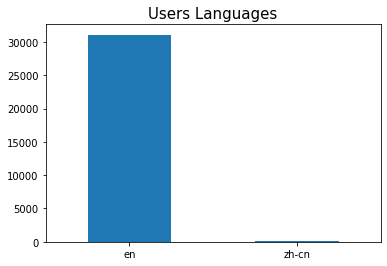

In [26]:
lang = pd.Series(df["account_language"]).dropna()
val = lang.value_counts()[:10]
ax = val.plot(kind='bar')
ax.set_title('Users Languages', fontsize=15)
# ax.invert_yaxis()
ax.set_xticklabels(val.index.format(), rotation='horizontal')
plt.show()
# https://www.iana.org/assignments/language-subtag-registry/language-subtag-registry

In [36]:
plot_datetime("account_creation_date",'Account creation date','Account')

# Daily Tweets

In [35]:
plot_datetime("data_tweet", "Daily Tweets", "Tweet")

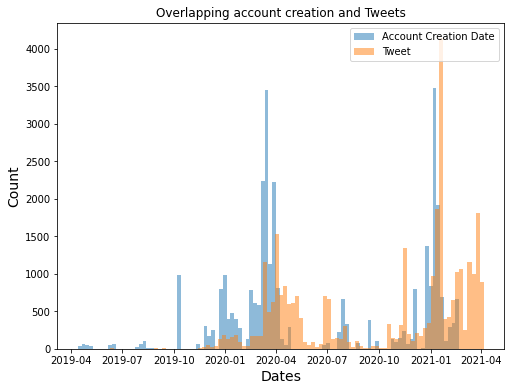

In [41]:
plt.figure(figsize=(8,6))
plt.hist(df["account_creation_date"], bins=100, alpha=0.5, label="Account Creation Date")
plt.hist(df["tweet_time"], bins=100, alpha=0.5, label="Tweet")
plt.xlabel("Dates", size=14)
plt.ylabel("Count", size=14)
plt.title("Overlapping account creation and Tweets")
plt.legend(loc='upper right')
plt.show()

# Info Tweets

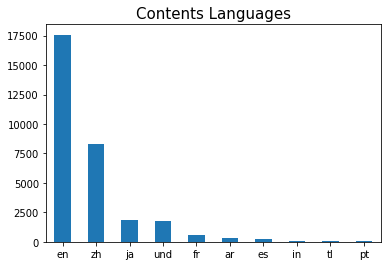

In [12]:
lang = pd.Series(df["tweet_language"]).dropna()
val = lang.value_counts()[:10]
ax = val.plot(kind='bar')
ax.set_title('Contents Languages', fontsize=15)
# ax.invert_yaxis()
ax.set_xticklabels(val.index.format(), rotation='horizontal')
plt.show()
# https://www.iana.org/assignments/language-subtag-registry/language-subtag-registry

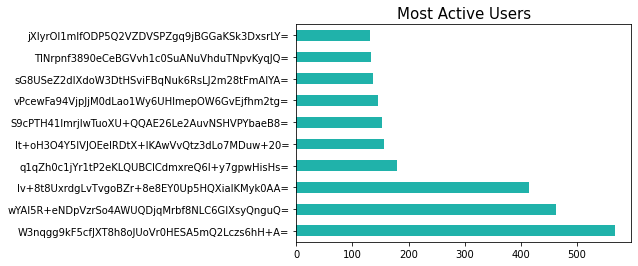

I primi 10 utenti più attivi su 2016 hanno postato il 7.93% dei tweets


In [13]:
users = pd.Series(df["user_screen_name"]).dropna()
ax = users.value_counts(ascending=False)[:10].plot(kind='barh', color='lightseagreen') #orange #lightseagreen
ax.set_title('Most Active Users', fontsize=15)
# ax.invert_yaxis()
plt.show()
x = users.value_counts(ascending=False)[:10]
value = x.sum() / len(df)
print(f"I primi 10 utenti più attivi su {len(users.value_counts(ascending=False))} hanno postato il {round(value*100,2)}% dei tweets")

# Split

In [15]:
rp = df[df["in_reply_to_userid"].notna()]
rt = df[df["retweet_tweetid"].notna() & df["in_reply_to_userid"].isna()]
qt = df[df["quoted_tweet_tweetid"].notna() & df["retweet_tweetid"].isna() & df["in_reply_to_userid"].isna()]
tot = df[df["quoted_tweet_tweetid"].isna() & df["retweet_tweetid"].isna() & df["in_reply_to_userid"].isna()] 
values = [(len(tot)/len(df)), (len(rt)/len(df)), 
              (len(rp)/len(df)), (len(qt)/len(df))]
labels = ["Original", "Retweet", "Reply", "Quote"]
fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="sum", y=values, x=labels))
fig.update_layout(
    title="Differences between df activity",
    xaxis_title="Kind of activity",
    yaxis_title="Percentage of activity",
    legend_title="Legend")
fig.show()
print(f"checksum activities: {len(qt) + len(rp) + len(rt) + len(tot) == len(df)}")


checksum activities: True


# Hashtags

In [20]:
hashtags = tweets_utils.hashtag_process(df)
pd.Series(hashtags).value_counts().sort_values(ascending=False)

Xinjiang             111
新疆是个好地方              104
XinjiangOnline        39
这里是新疆                 22
中国                    13
jenniferatntd         11
Uyghur                 7
ポタラ宮                   6
NaturePhotography      1
Swans                  1
dtype: int64

# URLs

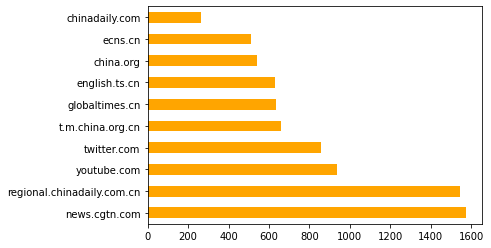

In [36]:
pd.Series(tweets_utils.format_urls(df["urls"])).value_counts(ascending=False)[:10].plot(kind='barh', color='orange') 
ax.set_title('URLs shared', fontsize=15)
plt.show()

In [73]:
# val = [x if ("https://youtu.be" in x) or ("https://www.youtube.com" in x) else np.nan for x in df["urls"]]
# lst_yt = []
# example_name = []
# for i in list(pd.Series(val).dropna()):
#     lst_yt.append(i.split("'")[1])
# value_urls = list(pd.Series(lst_yt).value_counts().values)
# urls_yt = list(pd.Series(lst_yt).value_counts().keys())
# for i in urls_yt:
#     example_name.append("Example")
#     df_yt = pd.DataFrame(list(zip(example_name, urls_yt, value_urls)), columns=["NAME", "URL", "VAL"])
# df_yt.to_csv("C:/Users/gianl/Desktop/Gi/Supsi/df_yt_xi.csv", line_terminator="\n", index=False, encoding="utf-8")

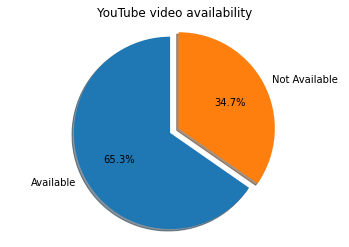

In [93]:
yt_df = pd.read_csv(path_yt[0], lineterminator="\n", low_memory=False)
av = len(yt_df[yt_df["available"]==True])
nav = len(yt_df[yt_df["available"]==False])
labels = 'Available', 'Not Available'
sizes = [av, nav]
explode = (0, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title("YouTube video availability")
plt.show()